In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, MaxPool2D

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
train_images = np.load('drive/MyDrive/Colab Notebooks/train_images_2023.npy')
train_labels = np.load('drive/MyDrive/Colab Notebooks/train_labels_2023.npy')
test_images = np.load('drive/MyDrive/Colab Notebooks/test_images_until2022.npy')
test_labels = np.load('drive/MyDrive/Colab Notebooks/test_labels_until2022.npy')

In [4]:
# 훈련 데이터가 너무 많아서 줄이기
train_images = train_images[len(train_images)//3 * 2:]
train_labels = train_labels[len(train_labels)//3 * 2:]

In [5]:
train_images = np.array(train_images).reshape(-1, 96, 96, 4) / 255.0
test_images = np.array(test_images).reshape(-1, 96, 96, 4) / 255.0

In [6]:
model = Sequential()

# Convolutional Block (Conv-Conv-Pool-Dropout)
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(96, 96, 4)))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Convolutional Block (Conv-Conv-Pool-Dropout)
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten()) # change this line
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [7]:
import keras

def lr_schedule(epoch):
    lrate = 0.001
    if epoch > 2:
        lrate = 0.0005
    if epoch > 4:
        lrate = 0.0001
    if epoch > 6:
        lrate = 0.00005
    return lrate

checkpoint = keras.callbacks.ModelCheckpoint('best_cnn_model.h5', save_best_only=True)
# N번의 연속적인 epoch 동안 개선이 없을 때 학습이 중단되도록 함
early_stopping = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

In [8]:
from keras.callbacks import LearningRateScheduler

history = model.fit(train_images, train_labels, batch_size=16, epochs=30, validation_data=(test_images, test_labels),
                    callbacks = [checkpoint, early_stopping, LearningRateScheduler(lr_schedule)])

Epoch 1/30
448/448 [==============================] - 39s 71ms/step - loss: 2.2091 - acc: 0.5400 - val_loss: 0.6970 - val_acc: 0.4794 - lr: 0.0010
Epoch 2/30
448/448 [==============================] - 28s 62ms/step - loss: 0.7036 - acc: 0.5548 - val_loss: 0.6964 - val_acc: 0.4801 - lr: 0.0010
Epoch 3/30
448/448 [==============================] - 22s 49ms/step - loss: 0.6919 - acc: 0.5571 - val_loss: 0.7060 - val_acc: 0.4790 - lr: 0.0010
Epoch 4/30
448/448 [==============================] - 24s 54ms/step - loss: 0.6860 - acc: 0.5633 - val_loss: 0.7023 - val_acc: 0.4796 - lr: 5.0000e-04
Epoch 5/30
448/448 [==============================] - 22s 49ms/step - loss: 0.6845 - acc: 0.5630 - val_loss: 0.7029 - val_acc: 0.4794 - lr: 5.0000e-04
Epoch 6/30
448/448 [==============================] - 24s 54ms/step - loss: 0.6783 - acc: 0.5718 - val_loss: 0.7086 - val_acc: 0.4877 - lr: 1.0000e-04
Epoch 7/30
448/448 [==============================] - 22s 49ms/step - loss: 0.6731 - acc: 0.5785 - val_los

In [12]:
from keras.models import load_model

# model = load_model('drive/MyDrive/Colab Notebooks/시가총액100종목중_뒤에서33퍼_8629.h5')
model = load_model('best_cnn_model.h5')

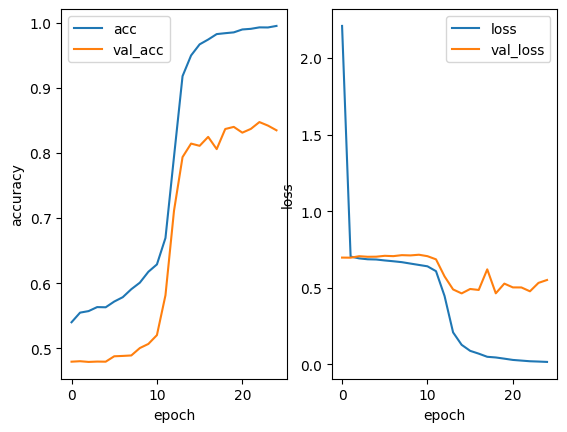

In [13]:
import matplotlib.pyplot as plt

plt.figure()

# 정확도 그래프
plt.subplot(1, 2, 1)
plt.plot(history.history['acc'], label='acc')
plt.plot(history.history['val_acc'], label='val_acc')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(loc='best')

# 손실 그래프
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(loc='best')

plt.show()

In [14]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

173/173 - 4s - loss: 0.4633 - acc: 0.8145 - 4s/epoch - 24ms/step
